# THE SPARKS FOUNDATION

## Data Science and Business Analytics

### Author : Gurtej Singh

### Task 1: Prediction of the percentage of a Student based on his/her study hours using supervised ML.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
url="http://bit.ly/w-data"
df= pd.read_csv(url)

In [3]:
print("First 5 values of data are :")
df.head()

First 5 values of data are :


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
print("Last 5 values of data are :")
df.tail()

Last 5 values of data are :


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#Checking for null values in the Dataset
df.isnull == True 

False

### Visualising Data:

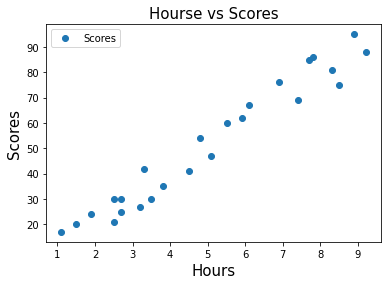

In [24]:
df.plot(x='Hours', y='Scores', style='o') 
plt.title('Hourse vs Scores',size=15)
plt.xlabel('Hours',size=15)
plt.ylabel('Scores',size=15)
plt.show()

### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Correlation

In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Preparing the data

In [8]:
X = df.iloc[:, 0:1].values   
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
Y = df.iloc[:, 1:].values  
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

### Splitting Data into Training and Testing Data

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0) 

## Training the Algorithm
### We have split our data into training and testing sets, and now is finally the time to train our algorithm

In [11]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, Y_train) 

print("Training is complete")

Training is complete


In [12]:
lr.coef_

array([[9.91065648]])

In [13]:
lr.intercept_

array([2.01816004])

### Plotting the regression line and the test data

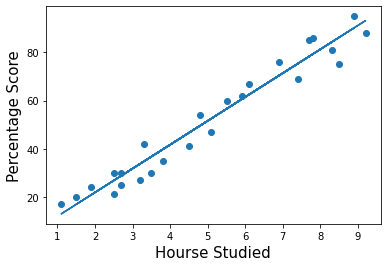

In [22]:
line = lr.coef_*X+lr.intercept_

plt.scatter(X, Y)
plt.plot(X, line);
plt.xlabel("Hourse Studied",size=15)
plt.ylabel("Percentage Score",size=15)
plt.show()

## Predictions

In [15]:
print(X_test)
Y_pred = lr.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing Actual vs Predicted

In [16]:
cmp = pd.DataFrame({'Actual': [Y_test], 'Predicted': [Y_pred]})  
cmp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


### Testing with our own data

In [17]:
hours = 9.25
own_pred = lr.predict([[hours]])
print("Number of Hours={}".format(hours))
print("Predicted Score={}".format(own_pred[0]))

Number of Hours=9.25
Predicted Score=[93.69173249]


#### According to the model, if a student studies for 9.25hrs/day,they are likely to score 93.69%

### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002975
